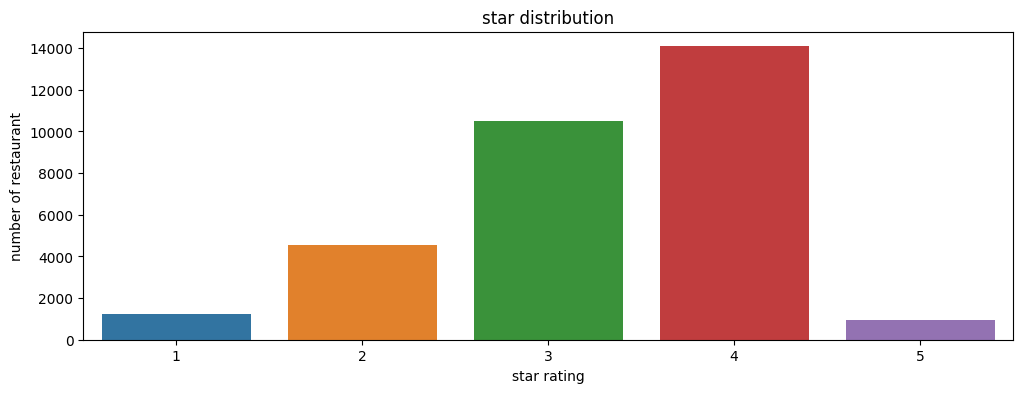

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
import math

root = os.getcwd()
business =  pd.read_json(root + '/yelp_academic_dataset_business.json', lines= True)

# rename star columns for later merge
business.rename({'stars':'business_star','user':'business_name'}, axis = 1, inplace = True)
# drop null value
business.dropna(inplace = True)

# only get business that are open in this dataset
business = business.loc[business.is_open == 1]

# we are only interested in restaurant business
business = business[business.categories.str.contains('restaurant', case = False)]

# plot graph to see the distribution of star rating to each restaurant
business['business_star'] = business['business_star'].apply(lambda x: math.floor(x))
x=business['business_star'].value_counts()
x=x.sort_index()

plt.figure(figsize=(12,4))
ax = sns.barplot(x=x.index, y=x.values)
plt.title("star distribution")
plt.ylabel('number of restaurant')
plt.xlabel('star rating')
plt.show()

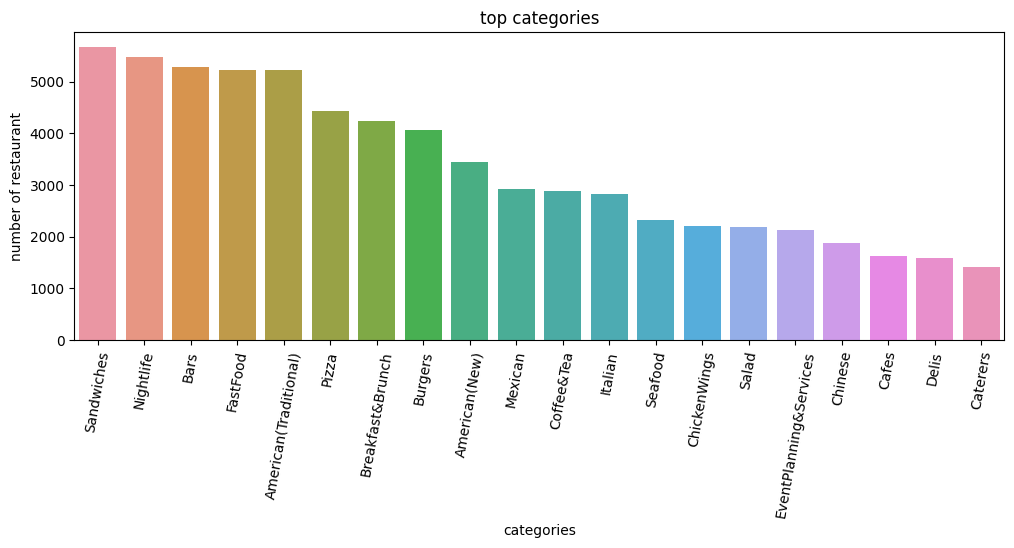

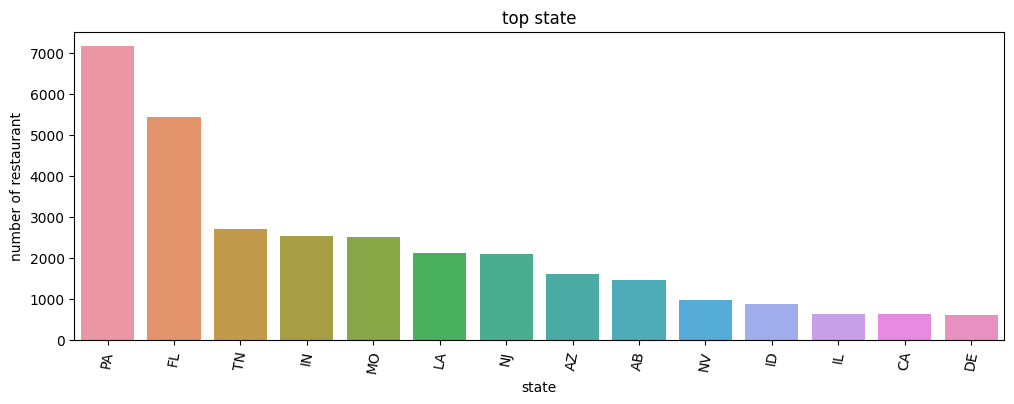

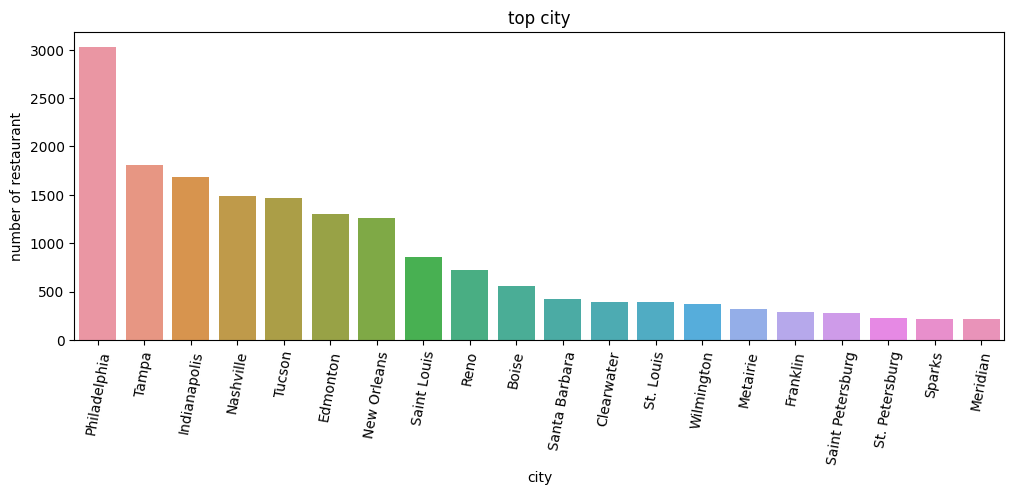

In [2]:
# plot graph for visualizing the top class in each column
def plot_top20_class(business, col):
    if col == 'categories':
        l = ','.join(business['categories'].astype('str')).replace(' ', '')

        df=pd.DataFrame(l.split(','),columns=[f'{col}'])

        x=df[col].value_counts()[2:]
    else:
        df=pd.DataFrame(business[col],columns=[f'{col}'])

        x=df[col].value_counts()[:]

    x=x.sort_values(ascending=False)
    x=x.iloc[0:20]

    plt.figure(figsize=(12,4))
    ax = sns.barplot(x=x.index, y=x.values)
    plt.title(f"top {col}")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=80)
    plt.ylabel('number of restaurant')
    plt.xlabel(f'{col}')

    plt.show()
plot_top20_class(business,'categories')
plot_top20_class(business,'state')
plot_top20_class(business,'city')

In [3]:
# choosing the state LA
# drop irrelevant column
business = business[business.state == 'LA']
business.drop(['state','is_open','city','postal_code'],axis=1,inplace=True)

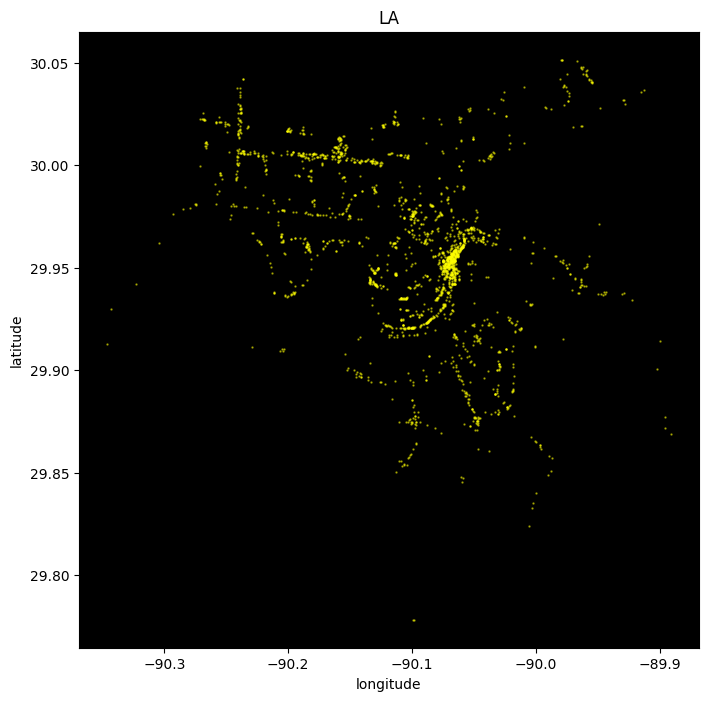

In [4]:
# get all ratings data
rating_data=business[['latitude','longitude','business_star','review_count']]

f, ax = plt.subplots(figsize=(8,8))

#a random point inside IL
lat = 31.136201268813068
lon = -92.29856362898695
#some adjustments to get the right pic
lon_min, lon_max = lon-5,lon+5
lat_min, lat_max = lat-5,lat+5
#subset for LA
ratings_data_LA=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_LA.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.5, alpha=0.5, subplots=True, ax=ax)
ax.set_title("LA")
ax.set_facecolor('black')

<AxesSubplot:ylabel='Frequency'>

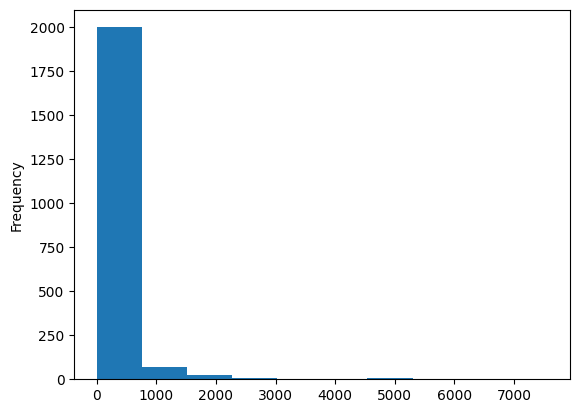

In [5]:
# most of the review distributed between 0-500
business.review_count.plot(kind = 'hist')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Acme Oyster House'),
  Text(1, 0, 'Oceana Grill'),
  Text(2, 0, 'Ruby Slipper - New Orleans'),
  Text(3, 0, "Mother's Restaurant"),
  Text(4, 0, 'Royal House'),
  Text(5, 0, "Commander's Palace"),
  Text(6, 0, 'Luke'),
  Text(7, 0, 'Cochon'),
  Text(8, 0, "Felix's Restaurant & Oyster Bar"),
  Text(9, 0, 'Gumbo Shop')])

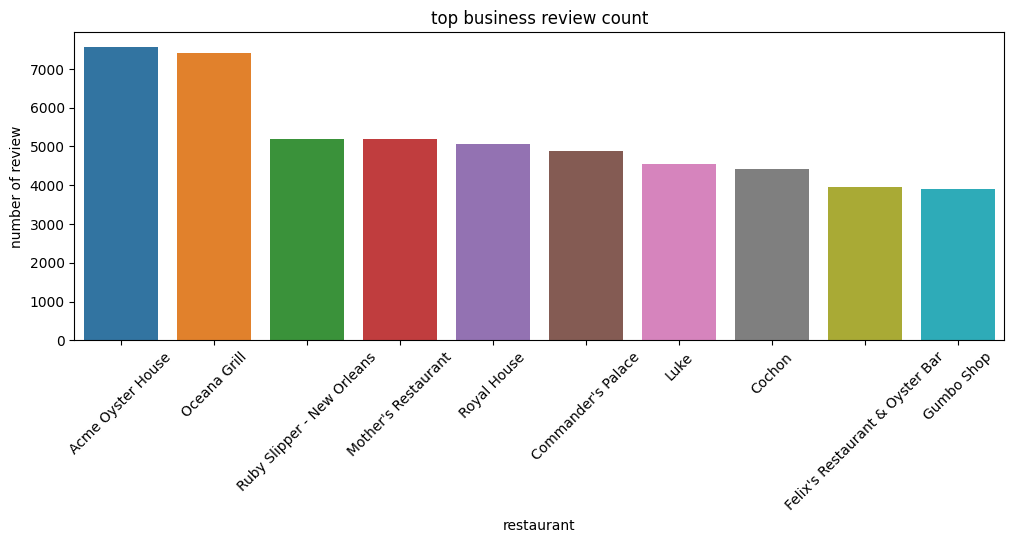

In [6]:
x=business.set_index('name')['review_count'].sort_values(ascending=False).iloc[:10]

plt.figure(figsize=(12,4))
ax = sns.barplot(x=x.index, y=x.values)
plt.title("top business review count")
plt.ylabel('number of review')
plt.xlabel('restaurant')
plt.xticks(rotation = 45)

In [7]:
data = {'review_id': [], 'user_id': [], 'business_id': [], 'review_star': [], 'date': [], 'text': [], 'useful_review': []}

with open(root + '/yelp_academic_dataset_review.json',encoding="utf-8") as f:
    for line in tqdm(f):
        review = json.loads(line)
        data['review_id'].append(review['review_id'])
        data['user_id'].append(review['user_id'])
        data['business_id'].append(review['business_id'])
        data['review_star'].append(review['stars'])
        data['date'].append(review['date'])
        data['text'].append(review['text'])
        data['useful_review'].append(review['useful'])

6990280it [00:36, 189242.96it/s]


In [8]:
review = pd.DataFrame(data)
review.head()

,review_id,user_id,business_id,review_star,date,text,useful_review
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,1


In [9]:
# remove review that is not useful
review = review[review.useful_review != 0]

In [10]:
# rename columns for later merge
# filter date to get only review within 5 years

review = review[review.date > '2019-01-01']

In [11]:
review.shape

(810389, 7)

In [12]:
# group user to find out who is influential in LA
user_review=review.groupby('user_id').agg({'review_id':['count'],'date':['max'],
                                'useful_review':['sum'],'review_star':['mean']})


top10_user=user_review.sort_values([('review_id','count')],ascending=False).head(10)

In [13]:
top10_user

,review_id,date,useful_review,review_star
,count,max,sum,mean
user_id,,,,
wXdbkFZsfDR7utJvbWElyA,613,2021-12-08 10:24:16,3877,4.161501
Sp2GV7D-_JLZMPQmDanzPQ,536,2022-01-18 00:53:26,1986,3.968284
R9IJ1Byr27n6wXj3QvJ2Lg,500,2021-12-18 01:25:15,5896,4.122000
fr1Hz2acAb3OaL3l6DyKNg,488,2022-01-16 12:14:05,8430,4.030738
vmUqcqMjlWoBM6qfmUXgyQ,488,2022-01-13 00:56:01,960,4.670082
R7NM7vIyUfSTXvMsw7jNTA,439,2021-12-04 17:48:30,1716,4.594533
WwulXySQN8t2hwqH_yWurA,431,2022-01-18 17:42:22,4451,4.635731
vHc-UrI9yfL_pnnc6nJtyQ,415,2022-01-18 21:46:20,8411,4.653012


In [14]:
review.drop('useful_review',axis=1,inplace=True)

In [15]:
df = review.merge(business, on='business_id', how='inner')

In [16]:
data = {'user_id': [], 'user_name': [], 'friends': [], 'useful_user': [], 'user_stars': []}

with open(root + '/yelp_academic_dataset_user.json',encoding="utf-8") as f:
    for line in tqdm(f):
        d = json.loads(line)
        data['user_id'].append(d['user_id'])
        data['user_name'].append(d['name'])
        data['friends'].append(d['friends'])
        data['useful_user'].append(d['useful'])
        data['user_stars'].append(d['average_stars'])
user = pd.DataFrame(data)
user.head()

1987897it [00:15, 124456.68it/s]


,user_id,user_name,friends,useful_user,user_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,4.27
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,3.54


In [17]:
# remove user with no friends
user = user[user.friends != 'None']

In [18]:
user.useful_user.describe()

count    1.109346e+06
mean     7.169227e+01
std      8.574568e+02
min      0.000000e+00
25%      1.000000e+00
50%      6.000000e+00
75%      2.600000e+01
max      2.062960e+05
Name: useful_user, dtype: float64

In [19]:
# filter user with at least more than 10 friends
user = user[user.useful_user > 10]
# drop userful_user
user.drop('useful_user', axis=1, inplace=True)

In [20]:
user.head()

,user_id,user_name,friends,user_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",4.27
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",3.54


In [21]:
df = df.merge(user, on='user_id', how='inner')

In [22]:
df.shape, df.isna().sum()

((31626, 18),
 review_id        0
 user_id          0
 business_id      0
 review_star      0
 date             0
 text             0
 name             0
 address          0
 latitude         0
 longitude        0
 business_star    0
 review_count     0
 attributes       0
 categories       0
 hours            0
 user_name        0
 friends          0
 user_stars       0
 dtype: int64)

In [23]:
tip =  pd.read_json(root + '/yelp_academic_dataset_tip.json', lines= True)
tip.head(), tip.shape

(                  user_id             business_id  \
 0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
 1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
 2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
 3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
 4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   
 
                                                 text                date  \
 0                     Avengers time with the ladies. 2012-05-18 02:17:21   
 1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
 2             It's open even when you think it isn't 2013-08-18 00:56:08   
 3                          Very decent fried chicken 2017-06-27 23:05:38   
 4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   
 
    compliment_count  
 0                 0  
 1                 0  
 2                 0  
 3                 0  
 4                 0  ,
 (908915, 5))

In [24]:
# drop out text = None, filter only date no later than 2019-01-01
tip = tip[tip.text != 'None']
tip = tip[tip.date > '2019-01-01']
tip.rename({'text':'additional_text'}, axis=1,inplace=True)
tip.drop(['compliment_count','date'],axis=1,inplace=True)

In [25]:
mapp = df.merge(tip, on=['business_id','user_id'], how='inner').additional_text.to_dict()

In [26]:
for k,v in mapp.items():
    df.loc[k,'additional_text'] = v

In [27]:
df.additional_text = df.additional_text.astype(str)

In [28]:
df.to_csv('processed.csv', index = False)